In [18]:
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [7]:
train = pd.read_csv('../data/train.txt', sep='\t')
valid = pd.read_csv('../data/valid.txt', sep='\t')
test = pd.read_csv('../data/test.txt', sep='\t')
train_vec = pd.read_csv('../data/train_vec.txt', sep='\t')
valid_vec = pd.read_csv('../data/valid_vec.txt', sep='\t')
test_vec = pd.read_csv('../data/test_vec.txt', sep='\t')

In [8]:
train_vec.head()

,Unnamed: 0,0d,0m,0million,0nd,0s,0st,0th,aa,aaliyah,...,yields,york,you,young,your,yr,yuan,zac,zendaya,zone
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
np.logspace(-5, 4, 10, base=10)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

In [17]:
result = []
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
    cls = LogisticRegression(random_state=42, max_iter=10000, C=C)
    cls.fit(train_vec.values, train.Category.values)
    
    train_acc = accuracy_score(cls.predict(train_vec.values), train.Category.values)
    valid_acc = accuracy_score(cls.predict(valid_vec.values), valid.Category.values)
    test_acc = accuracy_score(cls.predict(test_vec.values), test.Category.values)
    
    result.append([C, train_acc, valid_acc, test_acc])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.99s/it]


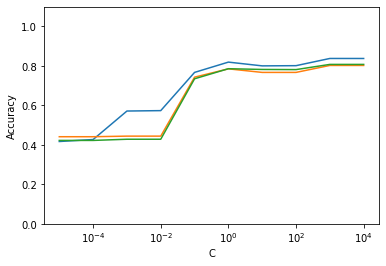

In [22]:
result = np.array(result).T
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='train')
plt.plot(result[0], result[3], label='train')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.show()

In [24]:
result

array([[1.00000000e-05, 1.00000000e-04, 1.00000000e-03, 1.00000000e-02,
        1.00000000e-01, 1.00000000e+00, 1.00000000e+01, 1.00000000e+02,
        1.00000000e+03, 1.00000000e+04],
       [4.17353823e-01, 4.27286357e-01, 5.71495502e-01, 5.73556972e-01,
        7.66960270e-01, 8.18965517e-01, 7.99943778e-01, 8.00974513e-01,
        8.37425037e-01, 8.37331334e-01],
       [4.41529235e-01, 4.41529235e-01, 4.44527736e-01, 4.44527736e-01,
        7.42878561e-01, 7.84857571e-01, 7.66866567e-01, 7.66866567e-01,
        8.02098951e-01, 8.02098951e-01],
       [4.22788606e-01, 4.22788606e-01, 4.28785607e-01, 4.28785607e-01,
        7.34632684e-01, 7.85607196e-01, 7.81859070e-01, 7.81109445e-01,
        8.07346327e-01, 8.07346327e-01]])

In [ ]:
#knock_59

